In [44]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [55]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [56]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)
train_x.shape

(60000, 28, 28)

In [57]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(160))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(120))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(80))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(60))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [58]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.3)


model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
model_fit = model.fit(train_x,train_y,          
          validation_data=(test_x,test_y),
          epochs=20,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 30s 496us/sample - loss: 0.5499 - acc: 0.8052 - val_loss: 0.4339 - val_acc: 0.8437
Epoch 2/20
60000/60000 [==============================] - 28s 465us/sample - loss: 0.4063 - acc: 0.8523 - val_loss: 0.3771 - val_acc: 0.8648
Epoch 3/20
60000/60000 [==============================] - 27s 455us/sample - loss: 0.3657 - acc: 0.8658 - val_loss: 0.3618 - val_acc: 0.8711
Epoch 4/20
60000/60000 [==============================] - 28s 464us/sample - loss: 0.3417 - acc: 0.8747 - val_loss: 0.3683 - val_acc: 0.8660
Epoch 5/20
60000/60000 [==============================] - 28s 463us/sample - loss: 0.3196 - acc: 0.8816 - val_loss: 0.3489 - val_acc: 0.8771
Epoch 6/20
60000/60000 [==============================] - 28s 465us/sample - loss: 0.3026 - acc: 0.8876 - val_loss: 0.3299 - val_acc: 0.8804
Epoch 7/20
60000/60000 [==============================] - 28s 467us/sample - loss: 0.2891 - acc: 0.8923 

In [60]:
import matplotlib.pyplot as plt


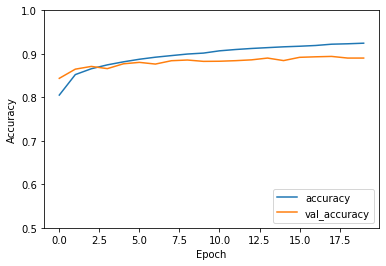

In [61]:
plt.plot(model_fit.history['acc'], label='accuracy')
plt.plot(model_fit.history['val_acc'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')